#Disaggregation experiments#

##Customary imports##

In [42]:
import numpy as np
import pandas as pd
from os.path import join

from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

#rcParams['figure.figsize'] = (12, 6)
rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')
import nilmtk
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation
from nilmtk.utils import print_dict, show_versions
from nilmtk.metrics import f1_score
#import seaborn as sns
#sns.set_palette("Set3", n_colors=12)


import warnings
warnings.filterwarnings("ignore")

## show versions for any diagnostics##

In [28]:
show_versions()



INSTALLED VERSIONS
------------------
commit: None
python: 2.7.9.final.0
python-bits: 64
OS: Windows
OS-release: 7
machine: AMD64
processor: Intel64 Family 6 Model 37 Stepping 2, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None

pandas: 0.16.1
nose: 1.3.6
Cython: 0.22
numpy: 1.9.2
scipy: 0.15.1
statsmodels: 0.6.1
IPython: 3.1.0
sphinx: 1.2.3
patsy: 0.3.0
dateutil: 2.4.2
pytz: 2015.4
bottleneck: None
tables: 3.1.1
numexpr: 2.3.1
matplotlib: 1.4.3
openpyxl: 1.8.5
xlrd: 0.9.3
xlwt: 0.7.5
xlsxwriter: 0.6.7
lxml: 3.4.2
bs4: 4.3.2
html5lib: None
httplib2: None
apiclient: None
sqlalchemy: 0.9.9
pymysql: None
psycopg2: None
None

Date: 2015-06-17 10:25:58.140000
Platform: Windows-7-6.1.7601-SP1
System version: 2.7
nilmtk version: 0.2.0.dev-4ae125a
nilm_metadata version: 0.2.0.dev-f4f8eaa
numpy version: 1.9.2
matplotlib version: 1.4.3
pandas version: 0.16.1
sklearn version: 0.16.1


##Load dataset##

In [43]:
data_dir = '/Users/GJWood/nilm_gjw_data/HDF5/'
gjw = DataSet(join(data_dir, 'nilm_gjw_data.hdf5'))
print('loaded ' + str(len(gjw.buildings)) + ' buildings')
building_number=1

loaded 1 buildings


#Let us perform our analysis on selected 2 days##

In [44]:
gjw.store.window = TimeFrame(start='2013-12-03 00:00:00', end='2013-12-05 00:00:00')
elec = gjw.buildings[building_number].elec
mains = elec.mains()

In [45]:
house = elec['fridge'] #only one meter so any selection will do
df = house.load().next() #load the first chunk of data into a dataframe
df.info() #check that the data is what we want (optional)
#note the data has two columns and a time index


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172800 entries, 2013-12-03 00:00:00+00:00 to 2013-12-04 23:59:59+00:00
Data columns (total 2 columns):
(power, apparent)    172800 non-null float32
(power, reactive)    172800 non-null float32
dtypes: float32(2)
memory usage: 2.6 MB


In [38]:
df.head()

physical_quantity            power         
type                      apparent reactive
2013-12-03 00:00:00+00:00      231       96
2013-12-03 00:00:01+00:00      231       96
2013-12-03 00:00:02+00:00      231       96
2013-12-03 00:00:03+00:00      231       96
2013-12-03 00:00:04+00:00      231       96

In [39]:
df.tail()

physical_quantity            power         
type                      apparent reactive
2013-12-04 23:59:55+00:00      271        0
2013-12-04 23:59:56+00:00      271        0
2013-12-04 23:59:57+00:00      271        0
2013-12-04 23:59:58+00:00      271        0
2013-12-04 23:59:59+00:00      271        0

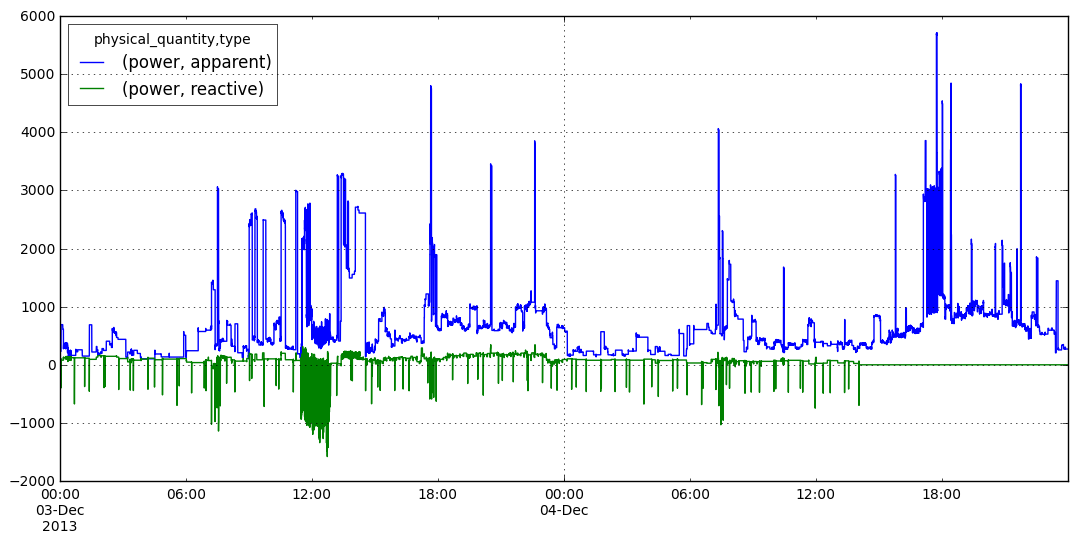

In [46]:
df.plot()

##Training##
We'll now do the training from the aggregate data. The algorithm segments the time series data into steady and transient states. Thus, we'll first figure out the transient and the steady states. Next, we'll try and pair the on and the off transitions based on their proximity in time and value.

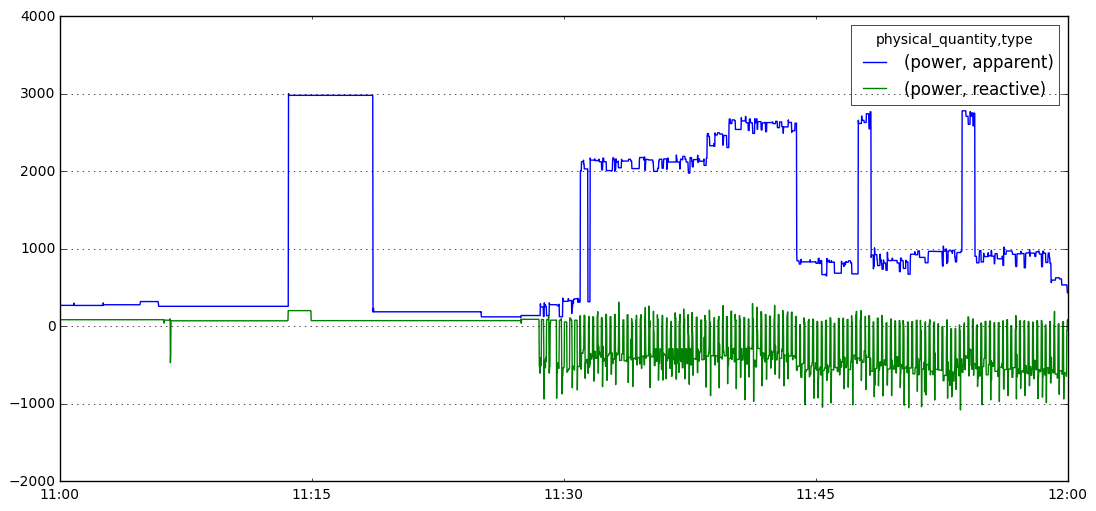

In [51]:
df.ix['2013-12-03 11:00:00':'2013-12-03 12:00:00'].plot()# select a time range and plot it

In [48]:
from nilmtk.disaggregate.hart_85 import Hart85
h = Hart85()
h.train(mains,cols=[('power','apparent'),('power','reactive')])


Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


ValueError: total size of new array must be unchanged

In [49]:
from nilmtk.disaggregate.hart_85 import Hart85
h = Hart85()
h.train(mains,cols=[('power','apparent')])

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.